In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('/content/Data_Tanaman_Padi_Sumatera_version_1.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provinsi        224 non-null    object 
 1   Tahun           224 non-null    int64  
 2   Produksi        224 non-null    float64
 3   Luas Panen      224 non-null    float64
 4   Curah hujan     224 non-null    float64
 5   Kelembapan      224 non-null    float64
 6   Suhu rata-rata  224 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 12.4+ KB


In [9]:
df.head()

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,Aceh,1993,1329536.0,323589.0,1627.0,82.00,26.06
1,Aceh,1994,1299699.0,329041.0,1521.0,82.12,26.92
2,Aceh,1995,1382905.0,339253.0,1476.0,82.72,26.27
3,Aceh,1996,1419128.0,348223.0,1557.0,83.00,26.08
4,Aceh,1997,1368074.0,337561.0,1339.0,82.46,26.31


In [16]:
df['Provinsi'].replace(['Aceh','Sumatera Utara','Sumatera Barat','Riau', 'Jambi', 'Sumatera Selatan', 'Bengkulu', 'Lampung'],[1,2,3,4,5,6,7,8], inplace=True)
df.head()

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,1,1993,1329536.0,323589.0,1627.0,82.00,26.06
1,1,1994,1299699.0,329041.0,1521.0,82.12,26.92
2,1,1995,1382905.0,339253.0,1476.0,82.72,26.27
3,1,1996,1419128.0,348223.0,1557.0,83.00,26.08
4,1,1997,1368074.0,337561.0,1339.0,82.46,26.31


In [20]:
df.rename(columns={'Provinsi':'provinsi','Tahun	Produksi':'tahun_produksi','Luas Panen':'luas_panen','Curah hujan':'curah_hujan','Kelembapan':'kelembapan','Suhu rata-rata':'suhu_rata-rata'})

,provinsi,Tahun,Produksi,luas_panen,curah_hujan,kelembapan,suhu_rata-rata
0,1,1993,1329536.00,323589.00,1627.0,82.00,26.06
1,1,1994,1299699.00,329041.00,1521.0,82.12,26.92
2,1,1995,1382905.00,339253.00,1476.0,82.72,26.27
3,1,1996,1419128.00,348223.00,1557.0,83.00,26.08
4,1,1997,1368074.00,337561.00,1339.0,82.46,26.31
...,...,...,...,...,...,...,...
219,8,2016,3831923.00,390799.00,2317.6,79.40,26.45
220,8,2017,4090654.00,396559.00,1825.1,77.04,26.36
221,8,2018,2488641.91,511940.93,1385.8,76.05,25.50
222,8,2019,2164089.33,464103.42,1706.4,78.03,27.23


In [23]:
from sklearn.cluster import KMeans
clusters = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(df)
  clusters.append(km.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [24]:
df.head()

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,1,1993,1329536.0,323589.0,1627.0,82.00,26.06
1,1,1994,1299699.0,329041.0,1521.0,82.12,26.92
2,1,1995,1382905.0,339253.0,1476.0,82.72,26.27
3,1,1996,1419128.0,348223.0,1557.0,83.00,26.08
4,1,1997,1368074.0,337561.0,1339.0,82.46,26.31


Text(0, 0.5, 'inertia')

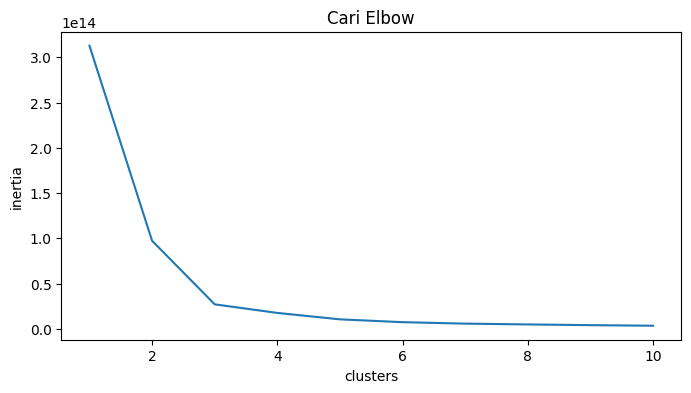

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#membuat plot inertia
fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)

ax.set_title('Cari Elbow')
ax.set_xlabel('clusters')
ax.set_ylabel('inertia')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


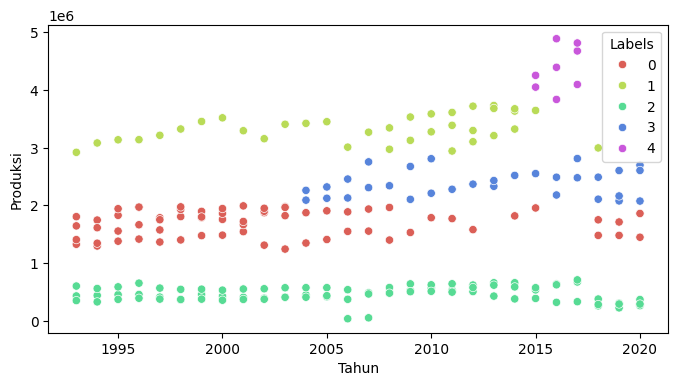

In [29]:
#membuat objek KMeans
km5 = KMeans(n_clusters=5).fit(df)
df['Labels'] = km5.labels_
plt.figure(figsize=(8,4))
sns.scatterplot(x=df['Tahun'], y=df['Produksi'], hue=df['Labels'], palette=sns.color_palette('hls',5))
plt.show()
